# Importing Libraries

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing, tree, svm
from sklearn.preprocessing import Normalizer, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer  
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt

# Utility functions

In [156]:
def plot_confusion_matrix(y_pred, y_val):
  cf_matrix = confusion_matrix(y_val, y_pred)
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, fmt = '')
  plt.title("Confusion Matrix")

def plot_roc(y, y_pred, name):
  fpr, tpr, thresholds = roc_curve(y, y_pred)
  roc_auc = auc(fpr, tpr)
  display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
  display.plot()
  plt.show()

# Loading Dataset

In [158]:
train = pd.read_csv('ozone_levels_train.csv')
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1:].values.reshape(-1)
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [159]:
test = pd.read_csv('ozone_levels_test.csv')
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1:].values.reshape(-1)
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Fitting classifiers

In [145]:
# Decision tree
clf_dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [146]:
# SVM
clf_svm = svm.SVC().fit(X_train, y_train)

In [147]:
# Logistic regression (ignore warning)
clf_lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0).fit(X_train, y_train)

c:\Users\inher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predictions

In [148]:
y_pred_lr = clf_lr.predict(X_test)
y_pred_dt = clf_dt.predict(X_test)
y_pred_svm = clf_lr.predict(X_test)


Plotting Descision Tree

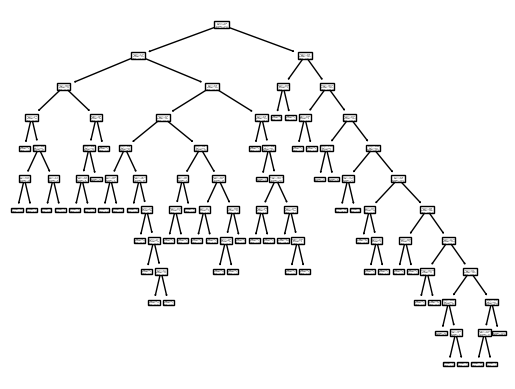

In [149]:
tree.plot_tree(clf_dt)
plt.show()

# Result: Logistic Regression

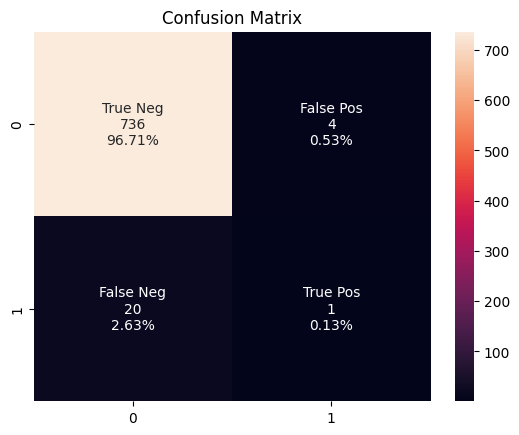

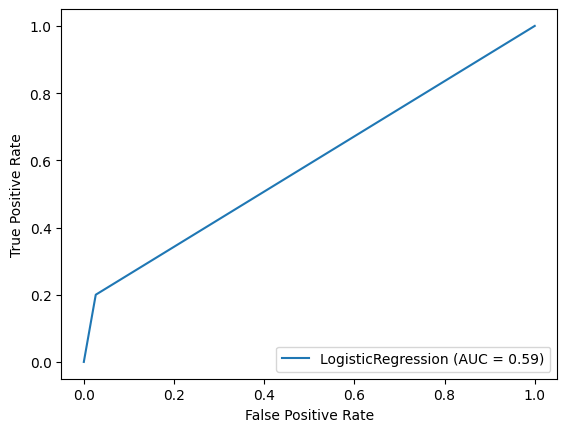

,precision,recall,f1-score,support
0.0,0.973545,0.994595,0.983957,740.000000
1.0,0.200000,0.047619,0.076923,21.000000
accuracy,0.968463,0.968463,0.968463,0.968463
macro avg,0.586772,0.521107,0.530440,761.000000
weighted avg,0.952199,0.968463,0.958927,761.000000


In [150]:
plot_confusion_matrix(y_pred_lr, y_test)
plot_roc(y_pred_lr, y_test, 'LogisticRegression')
metrics_lr = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).transpose() 
metrics_lr

# Result: Desicion Tree

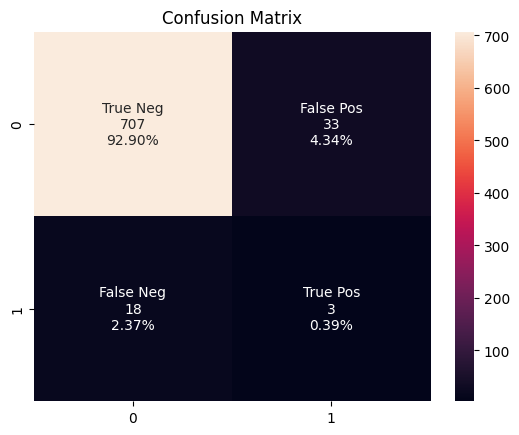

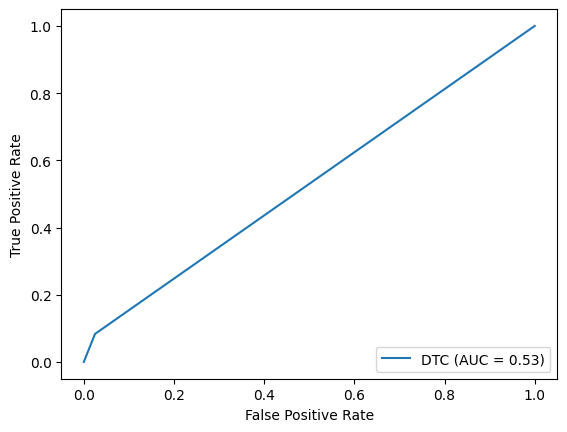

,precision,recall,f1-score,support
0.0,0.975172,0.955405,0.965188,740.000000
1.0,0.083333,0.142857,0.105263,21.000000
accuracy,0.932983,0.932983,0.932983,0.932983
macro avg,0.529253,0.549131,0.535225,761.000000
weighted avg,0.950562,0.932983,0.941458,761.000000


In [151]:
plot_confusion_matrix(y_pred_dt, y_test)
plot_roc(y_pred_dt, y_test, 'DTC')
metrics_dt = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).transpose() 
metrics_dt

# Result: SVM

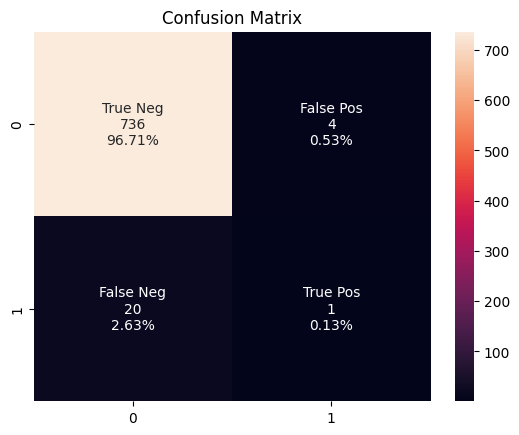

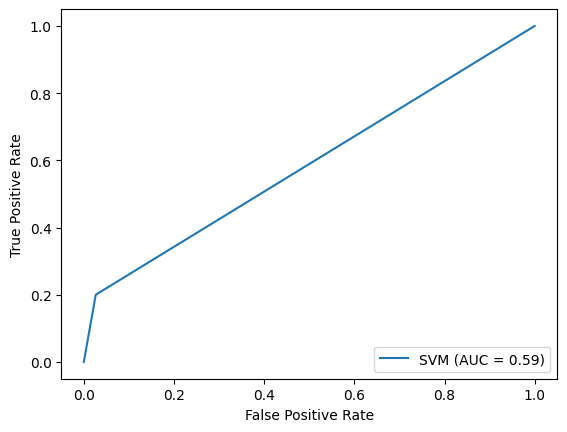

,precision,recall,f1-score,support
0.0,0.973545,0.994595,0.983957,740.000000
1.0,0.200000,0.047619,0.076923,21.000000
accuracy,0.968463,0.968463,0.968463,0.968463
macro avg,0.586772,0.521107,0.530440,761.000000
weighted avg,0.952199,0.968463,0.958927,761.000000


In [153]:
plot_confusion_matrix(y_pred_svm, y_test)
plot_roc(y_pred_svm, y_test, 'SVM')
metrics_svm = pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).transpose() 
metrics_svm

# Remarks

The dataset has a great imbalance. The resulting ROC line is almost like a regression line as it flattens after reaching a threshold.